<a href="https://colab.research.google.com/github/hakmin1015/ArtificialIntelligence/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

![header](https://capsule-render.vercel.app/api?type=soft&text=Image%20Classification%20using%20K-Nearest%20Neighbor&fontSize=28&fontAlignY=50&height=100&color=b2e39c)

|숙제번호|과목명|이름|전공|학번|
|:------:|:----:|:--:|:--:|:--:|
|Homework #2|인공지능|이학민|융합전자공학전공|201910906|

<img src="https://img.shields.io/badge/Python-3776AB?style=flat-square&logo=Python&logoColor=white"/> <img src="https://img.shields.io/badge/TensorFlow-FF6F00?style=flat-square&logo=tensorflow&logoColor=white"/> <img src="https://img.shields.io/badge/Google Colab-F9AB00?style=flat-square&logo=googlecolab&logoColor=white"/> <img src="https://img.shields.io/badge/Jupyter Notebook-F37626?style=flat-square&logo=jupyter&logoColor=white">
***



# 과제 설명

* K-Nearest Neighbor(KNN) 구현
* 임의의 K를 입력받을 수 있도록 하고 K의 값으로 1,3,5,7,9,11,13,15을 사용하여 테스트를 진행한다.
* Neighbor의 Distance 계산 방식으로 L1(Manhattan)과 L2(Euclidean)을 적용한다.
* 주어진 데이터에서 KNN 알고리즘에서 사용할 수 있는 최적의 K value와 Distance 계산 방식이 무엇인지 결정한다.
* 데이터를 불러오는 Type이 달라지면 어떤 변화가 생기는지 실험한다.

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/AI/lab3/
!pwd

/content/drive/MyDrive/AI/lab3
/content/drive/MyDrive/AI/lab3


In [ ]:
def unpickle(file):
  import pickle
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
  return dict

In [ ]:
bat1 = unpickle('data_batch_1')
bat2 = unpickle('data_batch_2')
bat3 = unpickle('data_batch_3')
bat4 = unpickle('data_batch_4')
bat5 = unpickle('data_batch_5')
bat_test = unpickle('test_batch')

In [ ]:
data = np.concatenate([bat1[b'data'], bat2[b'data'], bat3[b'data'], bat4[b'data'], bat5[b'data']])
labels = np.concatenate([bat1[b'labels'], bat2[b'labels'], bat3[b'labels'], bat4[b'labels'], bat5[b'labels']])

In [ ]:
np.shape(data)

(50000, 3072)

In [ ]:
np.shape(labels)

(50000,)

In [ ]:
train_data = data
train_label = labels
test_data = bat_test[b'data']
test_label = bat_test[b'labels']
test_size = 10
type(data[0,0])

numpy.uint8

In [ ]:
from google.colab import files
files.upload()

Saving knn_L1.py to knn_L1.py
Saving knn_L2.py to knn_L2.py


{'knn_L1.py': b'# -*- coding: utf-8 -*-\n"""knn_L1.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1Iz6o-k6B2wQtj3rGTT2g9tjEczzbAgL-\n\n#L1 (Manhattan) distance\n"""\n\nimport numpy as np\n\nclass NearestNeighbor:\n\n  def __init__(self):\n    pass\n\n  def train(self,X,y):\n    self.Xtr = X\n    self.ytr = y\n\n  def predict(self,X):\n    num_test = X.shape[0]\n    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)\n\n    k = int(input("Input k value(odd) : ")) # \xec\x9e\x84\xec\x9d\x98\xec\x9d\x98 k\xeb\xa5\xbc \xec\x9e\x85\xeb\xa0\xa5\xeb\xb0\x9b\xec\x9d\x84 \xec\x88\x98 \xec\x9e\x88\xeb\x8f\x84\xeb\xa1\x9d \xec\xbd\x94\xeb\x93\x9c \xec\xb6\x94\xea\xb0\x80\n\n    for i in range(num_test):\n      distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)\n      sorted_idx = np.argsort(distances)  # \xec\x98\xa4\xeb\xa6\x84\xec\xb0\xa8\xec\x88\x9c \xec\xa0\x95\xeb\xa0\xac\n      k_sorted_idx = sorted_idx[:k]  

In [ ]:
from knn_L1 import NearestNeighbor

NN_classifier = NearestNeighbor()
NN_classifier.train(train_data,train_label)
test_in = test_data[0:test_size]
print("Test Label :",test_label[0:test_size],"\n")

pred_arr = {}
num_correct = [0]*8
accuracy_L1 = [0]*8

for i in range(8):
  pred = NN_classifier.predict(test_in)
  pred_arr[i] = pred
  print("Predict :",pred_arr[i])
  num_correct[i] = np.sum(pred_arr[i] == test_label[0:test_size])
  accuracy_L1[i] = (float(num_correct[i]) / test_size) * 100
  print("The accuracy is (%) :",accuracy_L1[i],"\n")

Test Label : [3, 8, 8, 0, 6, 6, 1, 6, 3, 1] 

Input k value(odd) : 1
Predict : [8 8 1 0 4 2 2 5 0 8]
The accuracy is (%) : 20.0 

Input k value(odd) : 3
Predict : [0 8 1 0 0 0 4 0 0 8]
The accuracy is (%) : 20.0 

Input k value(odd) : 5
Predict : [0 1 8 0 0 2 4 0 0 8]
The accuracy is (%) : 20.0 

Input k value(odd) : 7
Predict : [0 1 8 0 0 2 4 0 0 8]
The accuracy is (%) : 20.0 

Input k value(odd) : 9
Predict : [0 1 8 0 0 2 4 2 0 1]
The accuracy is (%) : 30.0 

Input k value(odd) : 11
Predict : [0 1 8 0 0 2 4 2 0 1]
The accuracy is (%) : 30.0 

Input k value(odd) : 13
Predict : [0 1 8 0 0 2 4 2 0 1]
The accuracy is (%) : 30.0 

Input k value(odd) : 15
Predict : [0 1 8 0 0 2 4 2 0 1]
The accuracy is (%) : 30.0 



In [ ]:
from knn_L2 import NearestNeighbor

NN_classifier = NearestNeighbor()
NN_classifier.train(train_data,train_label)
test_in = test_data[0:test_size]
print("Test Label :",test_label[0:test_size],"\n")

pred_arr = {}
num_correct = [0]*8
accuracy_L2 = [0]*8

for i in range(8):
  pred = NN_classifier.predict(test_in)
  pred_arr[i] = pred
  print("Predict :",pred_arr[i])
  num_correct[i] = np.sum(pred_arr[i] == test_label[0:test_size])
  accuracy_L2[i] = (float(num_correct[i]) / test_size) * 100
  print("The accuracy is (%) :",accuracy_L2[i],"\n")

Test Label : [3, 8, 8, 0, 6, 6, 1, 6, 3, 1] 

Input k value(odd) : 1
Predict : [8 0 8 0 2 6 5 2 2 6]
The accuracy is (%) : 30.0 

Input k value(odd) : 3
Predict : [8 0 8 2 2 6 2 0 7 2]
The accuracy is (%) : 20.0 

Input k value(odd) : 5
Predict : [0 0 8 0 6 6 2 2 2 2]
The accuracy is (%) : 40.0 

Input k value(odd) : 7
Predict : [8 0 8 0 2 6 2 0 2 8]
The accuracy is (%) : 30.0 

Input k value(odd) : 9
Predict : [8 0 8 0 4 6 3 2 2 2]
The accuracy is (%) : 30.0 

Input k value(odd) : 11
Predict : [8 8 8 0 4 6 2 0 3 2]
The accuracy is (%) : 50.0 

Input k value(odd) : 13
Predict : [8 0 8 0 4 6 3 0 5 2]
The accuracy is (%) : 30.0 

Input k value(odd) : 15
Predict : [8 0 8 0 2 0 3 0 5 2]
The accuracy is (%) : 20.0 



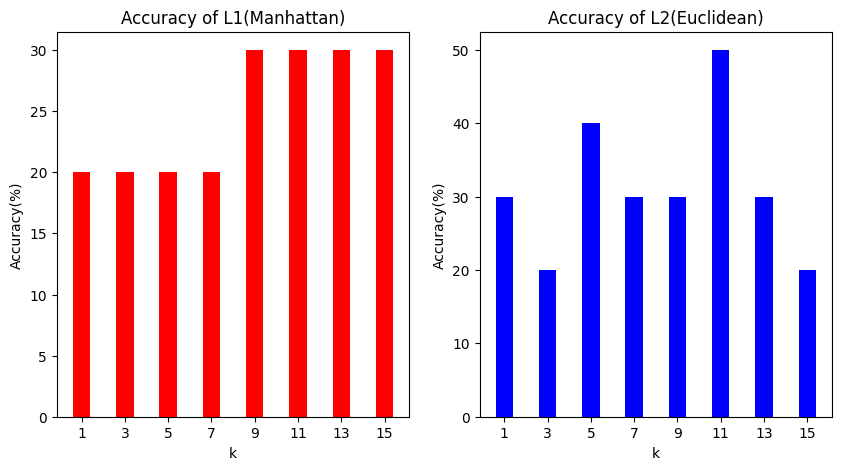

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].bar(range(1,16,2), accuracy_L1, color='r')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Accuracy(%)')
axs[0].set_title('Accuracy of L1(Manhattan)')
axs[0].set_xticks(range(1,16,2))

axs[1].bar(range(1,16,2), accuracy_L2, color='b')
axs[1].set_xlabel('k')
axs[1].set_ylabel('Accuracy(%)')
axs[1].set_title('Accuracy of L2(Euclidean)')
axs[1].set_xticks(range(1,16,2))
plt.show()

L1(Manhattan)과 L2(Euclidean)의 정확도를 나타내는 막대 그래프

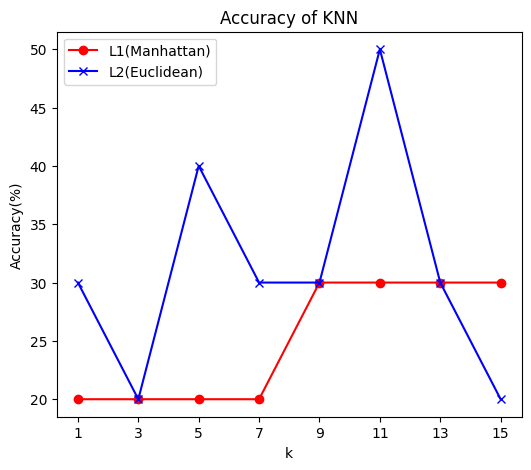

In [ ]:
plt.figure(figsize=(6,5))

plt.plot(range(1,16,2), accuracy_L1, color='r', marker='o', label='L1(Manhattan)')
plt.plot(range(1,16,2), accuracy_L2, color='b', marker='x', label='L2(Euclidean)')

plt.xlabel('k')
plt.ylabel('Accuracy(%)')
plt.title('Accuracy of KNN')
plt.xticks(range(1,16,2))
plt.legend()
plt.show()

L1(Manhattan)과 L2(Euclidean)를 비교하기 용이하도록 중첩 차트를 추가함.



---


### data를 불러오는 과정에서 정보의 소실을 줄이기 위하여 .astype("float") 코드를 추가할 수 있다.

### 이 때 KNN의 Accuracy가 어떻게 변화하는지 측정하였다.

In [ ]:
train_data = data.astype("float")
train_label = labels
test_data = bat_test[b'data'].astype("float")
test_label = bat_test[b'labels']
test_size = 10
type(data[0,0])

numpy.uint8

In [ ]:
from knn_L1 import NearestNeighbor

NN_classifier = NearestNeighbor()
NN_classifier.train(train_data,train_label)
test_in = test_data[0:test_size]
print("Test Label :",test_label[0:test_size],"\n")

pred_arr = {}
num_correct = [0]*8
accuracy_L1 = [0]*8

for i in range(8):
  pred = NN_classifier.predict(test_in)
  pred_arr[i] = pred
  print("Predict :",pred_arr[i])
  num_correct[i] = np.sum(pred_arr[i] == test_label[0:test_size])
  accuracy_L1[i] = (float(num_correct[i]) / test_size) * 100
  print("The accuracy is (%) :",accuracy_L1[i],"\n")

Test Label : [3, 8, 8, 0, 6, 6, 1, 6, 3, 1] 

Input k value(odd) : 1
Predict : [4 8 1 0 4 6 4 2 4 8]
The accuracy is (%) : 30.0 

Input k value(odd) : 3
Predict : [4 8 8 0 4 6 3 2 4 8]
The accuracy is (%) : 40.0 

Input k value(odd) : 5
Predict : [2 8 8 0 4 6 1 2 4 8]
The accuracy is (%) : 50.0 

Input k value(odd) : 7
Predict : [2 8 8 0 4 6 6 4 2 8]
The accuracy is (%) : 40.0 

Input k value(odd) : 9
Predict : [2 8 8 0 4 6 6 2 2 8]
The accuracy is (%) : 40.0 

Input k value(odd) : 11
Predict : [2 8 8 0 4 6 6 2 2 8]
The accuracy is (%) : 40.0 

Input k value(odd) : 13
Predict : [2 8 8 0 4 6 6 2 2 8]
The accuracy is (%) : 40.0 

Input k value(odd) : 15
Predict : [2 8 8 0 4 6 6 4 2 8]
The accuracy is (%) : 40.0 



In [ ]:
from knn_L2 import NearestNeighbor

NN_classifier = NearestNeighbor()
NN_classifier.train(train_data,train_label)
test_in = test_data[0:test_size]
print("Test Label :",test_label[0:test_size],"\n")

pred_arr = {}
num_correct = [0]*8
accuracy_L2 = [0]*8

for i in range(8):
  pred = NN_classifier.predict(test_in)
  pred_arr[i] = pred
  print("Predict :",pred_arr[i])
  num_correct[i] = np.sum(pred_arr[i] == test_label[0:test_size])
  accuracy_L2[i] = (float(num_correct[i]) / test_size) * 100
  print("The accuracy is (%) :",accuracy_L2[i],"\n")

Test Label : [3, 8, 8, 0, 6, 6, 1, 6, 3, 1] 

Input k value(odd) : 1
Predict : [4 8 8 0 4 6 4 2 4 8]
The accuracy is (%) : 40.0 

Input k value(odd) : 3
Predict : [2 8 8 0 4 6 2 2 4 8]
The accuracy is (%) : 40.0 

Input k value(odd) : 5
Predict : [2 8 8 0 4 6 6 2 4 8]
The accuracy is (%) : 40.0 

Input k value(odd) : 7
Predict : [2 8 8 8 4 6 6 4 4 8]
The accuracy is (%) : 30.0 

Input k value(odd) : 9
Predict : [4 8 8 0 4 6 6 2 2 8]
The accuracy is (%) : 40.0 

Input k value(odd) : 11
Predict : [4 8 8 0 4 6 6 2 2 8]
The accuracy is (%) : 40.0 

Input k value(odd) : 13
Predict : [2 8 8 8 4 6 6 2 2 8]
The accuracy is (%) : 30.0 

Input k value(odd) : 15
Predict : [4 8 8 8 4 6 6 2 2 8]
The accuracy is (%) : 30.0 



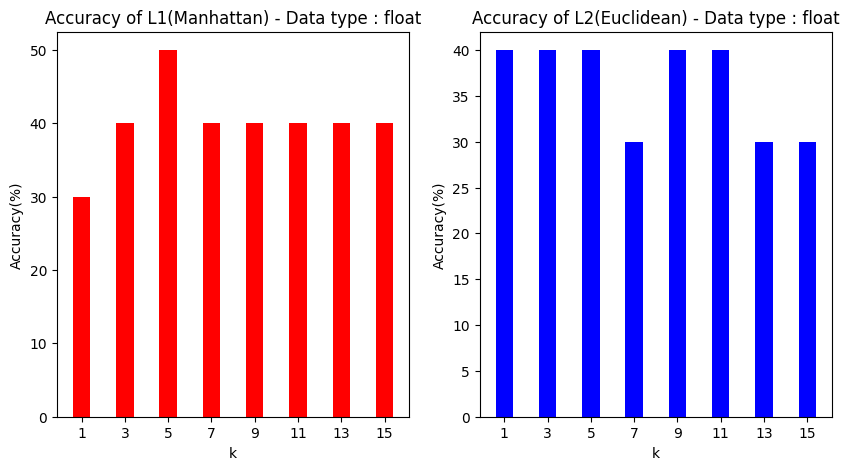

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].bar(range(1,16,2), accuracy_L1, color='r')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Accuracy(%)')
axs[0].set_title('Accuracy of L1(Manhattan) - Data type : float')
axs[0].set_xticks(range(1,16,2))

axs[1].bar(range(1,16,2), accuracy_L2, color='b')
axs[1].set_xlabel('k')
axs[1].set_ylabel('Accuracy(%)')
axs[1].set_title('Accuracy of L2(Euclidean) - Data type : float')
axs[1].set_xticks(range(1,16,2))
plt.show()

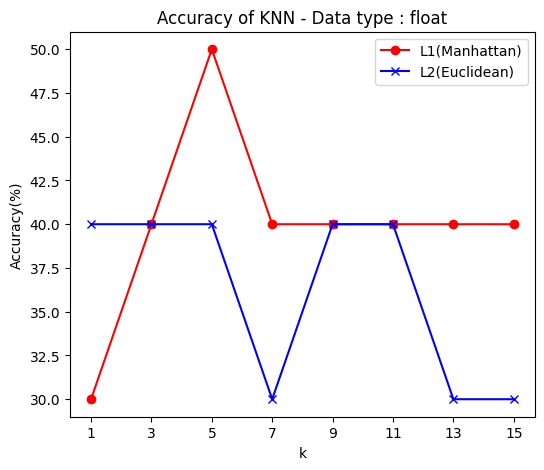

In [ ]:
plt.figure(figsize=(6,5))

plt.plot(range(1,16,2), accuracy_L1, color='r', marker='o', label='L1(Manhattan)')
plt.plot(range(1,16,2), accuracy_L2, color='b', marker='x', label='L2(Euclidean)')

plt.xlabel('k')
plt.ylabel('Accuracy(%)')
plt.title('Accuracy of KNN - Data type : float')
plt.xticks(range(1,16,2))
plt.legend()
plt.show()

#결론
* Data를 float형으로 불러오지 않았을 때, L2(Euclidean)방식에서 k=11를 적용하면 KNN의 정확도가 50%로 가장 높게 나타났다.

* Data를 float형으로 불러왔을 때, L1(Manhattan)방식에서 k=5를 적용하면 KNN의 정확도가 50%로 가장 높게 나타났다.